In [1]:
import tensorflow as tf
import os
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from datetime import datetime
import joblib
from utils.data_loader import load_as_maps
from models.unet import build_unet

In [ ]:
# Specify datasets that should be used for training
datasets=["exp1","exp5","exp6","exp7"]

# Specify index of target variable
# 0 for fco2
# 1 for fco2_pre 
# 2 for co2flux 
# 3 for co2flux_pre
target_index = 3 

# Specify model parameters
lr = 0.0002
batch_size = 2
base_filters = 32
dropout_rate = 0.1
kernel_size= (3,3)
n_epochs = 100

In [ ]:
# load data
features, targets = load_as_maps(datasets=datasets, target_index=target_index)

# split data
X_train = features[:int(0.8 * len(features))]
Y_train = targets[:int(0.8 * len(targets))]
X_val = features[int(0.8 * len(features)):int(0.9 * len(features))]
Y_val = targets[int(0.8 * len(targets)):int(0.9 * len(targets))]
X_test = features[int(0.9 * len(features)):]
Y_test = targets[int(0.9 * len(targets)):]

# scale data
scaler = MinMaxScaler()
n_samples, h, w, n_features = X_train.shape
X_train_flat = X_train.reshape(-1,n_features)
X_train_scaled_flat = scaler.fit_transform(X_train_flat)
X_train = X_train_scaled_flat.reshape(n_samples, h, w, n_features)


n_samples, h, w, n_features = X_val.shape
X_val_flat = X_val.reshape(-1,n_features)
X_val_scaled_flat = scaler.transform(X_val_flat)
X_val = X_val_scaled_flat.reshape(n_samples, h, w, n_features)

n_samples, h, w, n_features = X_test.shape
X_test_flat = X_test.reshape(-1,n_features)
X_test_scaled_flat = scaler.transform(X_test_flat)
X_test = X_test_scaled_flat.reshape(n_samples, h, w, n_features)

# save scaler
timestamp = datetime.now().strftime('%Y-%m-%d_%H-%M')
folder_path = "../../outputs/u-net/" + timestamp
os.makedirs(folder_path, exist_ok=True)

joblib.dump(scaler, folder_path + '/scaler.pkl')

['../../outputs/u-net/2025-09-28_15-11/scaler.pkl']

In [ ]:
# build model
model = build_unet((167, 360, 13),base_filters,kernel_size,dropout_rate)
model.compile(optimizer=tf.keras.optimizers.Nadam(learning_rate=lr), loss='mse', metrics=['mae'])
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 167, 360,  │          0 │ -                 │
│ (InputLayer)        │ 13)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d_1    │ (None, 168, 360,  │          0 │ input_layer_1[0]… │
│ (ZeroPadding2D)     │ 13)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_15 (Conv2D)  │ (None, 168, 360,  │      3,776 │ zero_padding2d_1… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 168, 360,  │        128 │ conv2d_15[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_14       │ (None, 168, 360,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_16 (Conv2D)  │ (None, 168, 360,  │      9,248 │ activation_14[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 168, 360,  │        128 │ conv2d_16[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_15       │ (None, 168, 360,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_3     │ (None, 84, 180,   │          0 │ activation_15[0]… │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_17 (Conv2D)  │ (None, 84, 180,   │     18,496 │ max_pooling2d_3[… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 84, 180,   │        256 │ conv2d_17[0][0]   │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_16       │ (None, 84, 180,   │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_18 (Conv2D)  │ (None, 84, 180,   │     36,928 │ activation_16[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 84, 180,   │        256 │ conv2d_18[0][0]   │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_17       │ (None, 84, 180,   │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_4     │ (None, 42, 90,    │          0 │ activation_17[0]… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_19 (Conv2D)  │ (None, 42, 90,    │     73,856 │ max_pooling2d_4[

 Total params: 2,149,153 (8.20 MB)

 Trainable params: 2,146,337 (8.19 MB)

 Non-trainable params: 2,816 (11.00 KB)

In [ ]:
lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-7)
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True)

H, W = 167, 360
mask_ch = 10

if Y_train.ndim == 3: Y_train = Y_train[..., None]
if Y_val.ndim   == 3: Y_val   = Y_val[..., None]

m_train = X_train[..., mask_ch]
m_val   = X_val[..., mask_ch]

history = model.fit(
    X_train,
    Y_train,
    validation_data=(X_val, Y_val, m_val),
    batch_size=batch_size,  
    epochs=n_epochs,  
    sample_weight=m_train,
    callbacks=[lr_scheduler, early_stopping],
    shuffle=True
)

Epoch 1/10
293/293 ━━━━━━━━━━━━━━━━━━━━ 178s 588ms/step - loss: 0.3600 - mae: 0.5445 - val_loss: 1.0270 - val_mae: 0.7880 - learning_rate: 2.0000e-04
Epoch 2/10
293/293 ━━━━━━━━━━━━━━━━━━━━ 158s 540ms/step - loss: 0.1554 - mae: 0.5205 - val_loss: 0.1843 - val_mae: 0.5559 - learning_rate: 2.0000e-04
Epoch 3/10
293/293 ━━━━━━━━━━━━━━━━━━━━ 149s 508ms/step - loss: 0.1298 - mae: 0.5371 - val_loss: 0.1397 - val_mae: 0.5767 - learning_rate: 2.0000e-04
Epoch 4/10
293/293 ━━━━━━━━━━━━━━━━━━━━ 152s 519ms/step - loss: 0.1147 - mae: 0.5464 - val_loss: 0.1461 - val_mae: 0.6138 - learning_rate: 2.0000e-04
Epoch 5/10
293/293 ━━━━━━━━━━━━━━━━━━━━ 153s 521ms/step - loss: 0.1062 - mae: 0.5439 - val_loss: 0.1435 - val_mae: 0.5816 - learning_rate: 2.0000e-04
Epoch 6/10
293/293 ━━━━━━━━━━━━━━━━━━━━ 149s 508ms/step - loss: 0.0993 - mae: 0.5327 - val_loss: 0.1322 - val_mae: 0.5894 - learning_rate: 2.0000e-04
Epoch 7/10
293/293 ━━━━━━━━━━━━━━━━━━━━ 154s 524ms/step - loss: 0.0936 - mae: 0.5314 - val_loss: 0.1

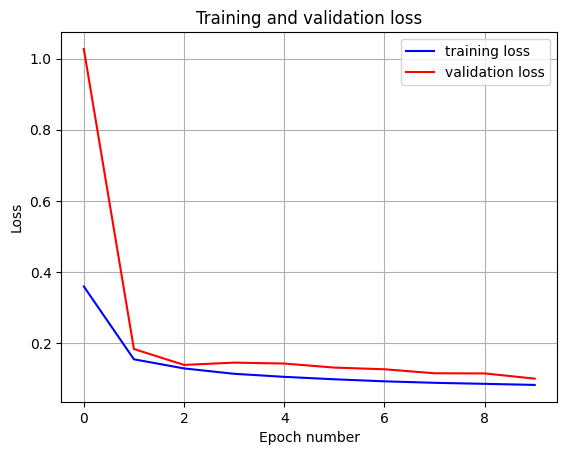

In [9]:
model.save(folder_path + "/model.keras")

plt.plot(history.history['loss'], color = 'blue', label = 'training loss')
plt.plot(history.history['val_loss'], color = 'red', label = 'validation loss')
plt.xlabel('Epoch number')
plt.ylabel('Loss')
plt.title('Training and validation loss')
plt.grid(True)
plt.legend()

timestamp = datetime.now().strftime('%Y-%m-%d_%H-%M')
path = folder_path + '/' + timestamp + '_training_validation_loss.png'
plt.savefig(path, format='png', dpi=300)
plt.show()  

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

test_pred = model.predict(X_test)
pred = test_pred.reshape(-1)
truth = Y_test.reshape(-1)

# computiung mse and mae for ocean points only
mask = X_test.reshape(-1,13)
mask = mask[:, 10] == 1
pred = pred[mask]
truth = truth[mask]

mse = mean_squared_error(pred, truth)
mae = mean_absolute_error(pred, truth)
print(f"Mean Squared Error: {mse:.3f}")
print(f"Mean Absolute Error: {mae:.3f}")

3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 466ms/step
Mean Squared Error: 0.242
Mean Absolute Error: 0.331


/Users/jakobmeggendorfer/Documents/CAU/Masterarbeit/master-thesis/venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
I0000 00:00:1759065780.689363 2840797 service.cc:148] XLA service 0x366dae720 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1759065780.689378 2840797 service.cc:156]   StreamExecutor device (0): Host, Default Version
2025-09-28 15:23:00.700440: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1759065780.815888 2840797 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


23/23 ━━━━━━━━━━━━━━━━━━━━ 194s 8s/step
23/23 ━━━━━━━━━━━━━━━━━━━━ 191s 8s/step


/Users/jakobmeggendorfer/Documents/CAU/Masterarbeit/master-thesis/src/utils/model_analysis.py:273: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(10, 5))


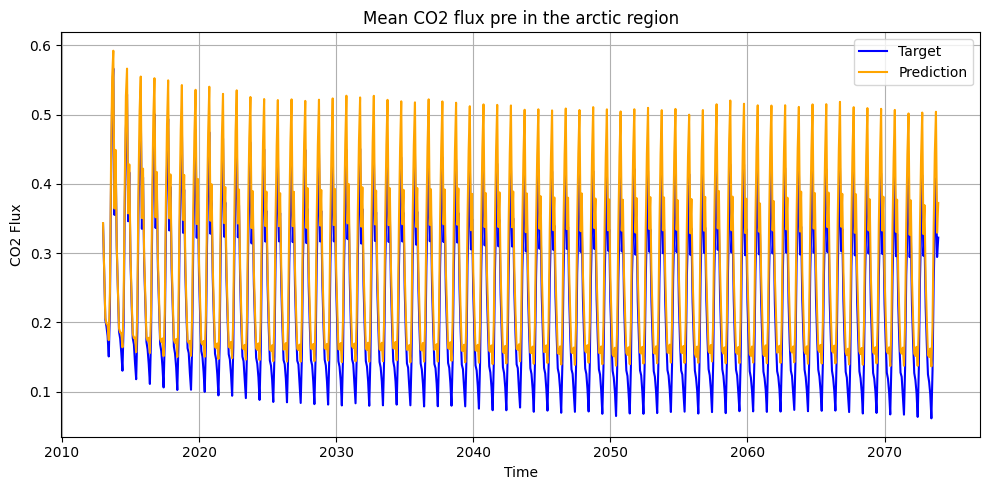

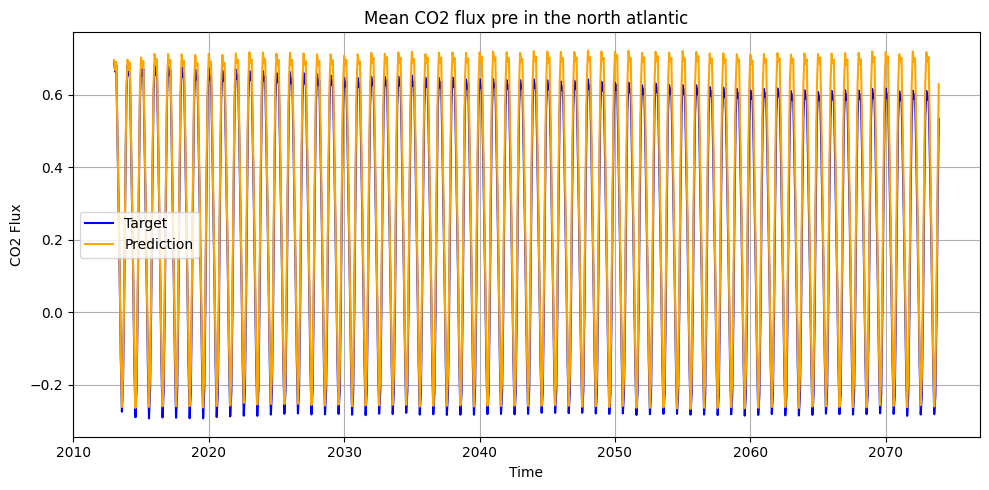

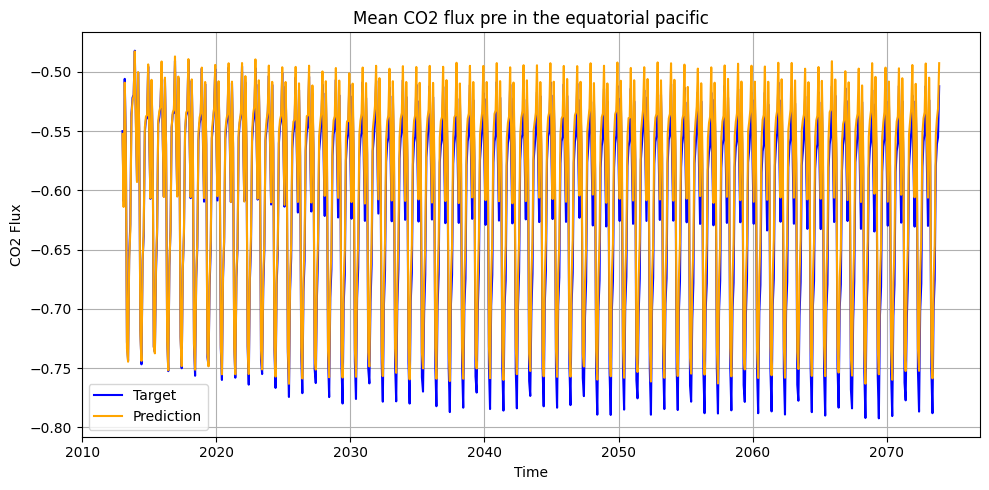

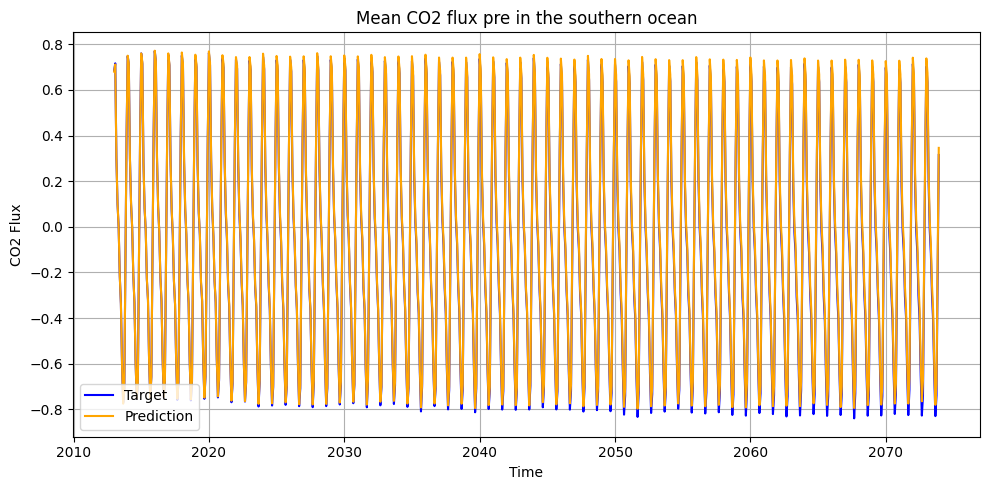

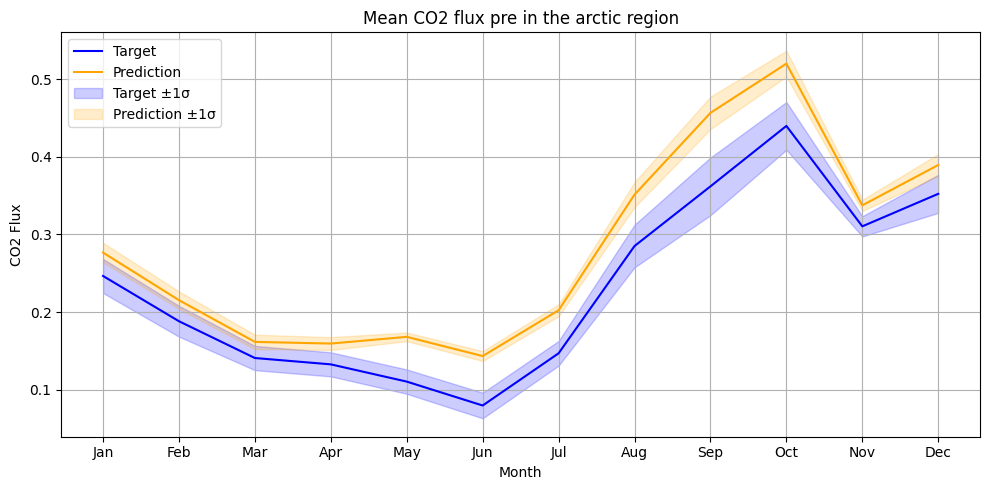

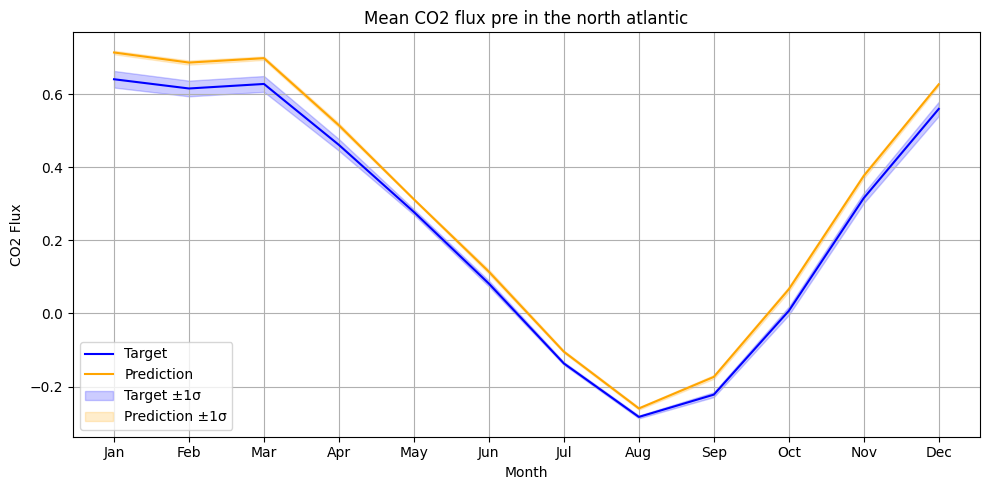

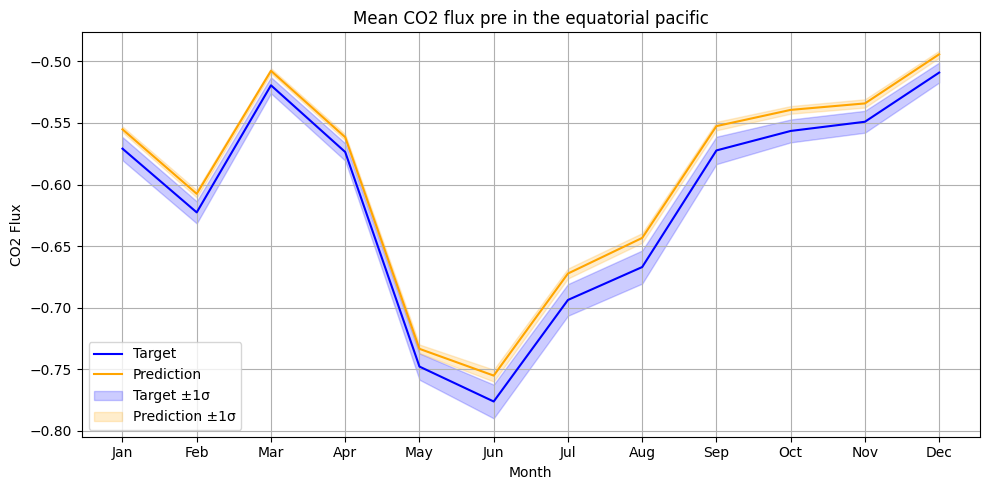

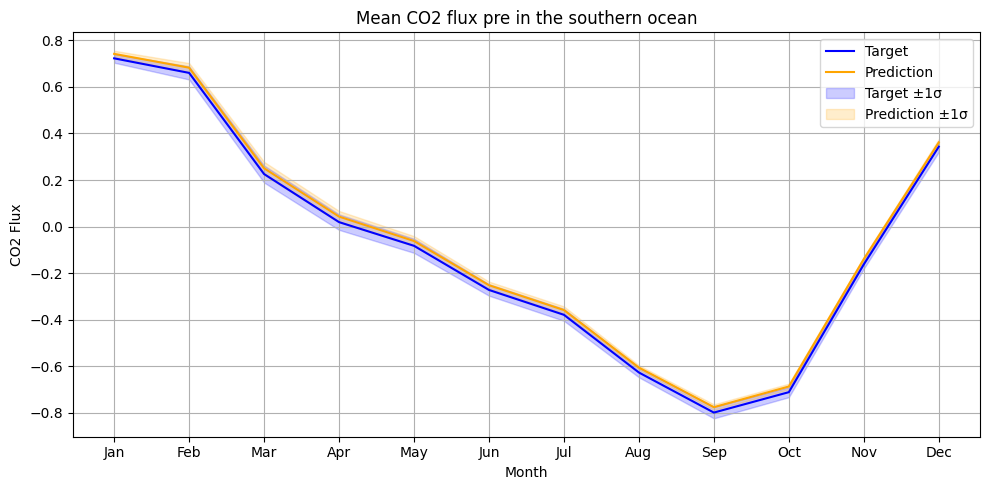

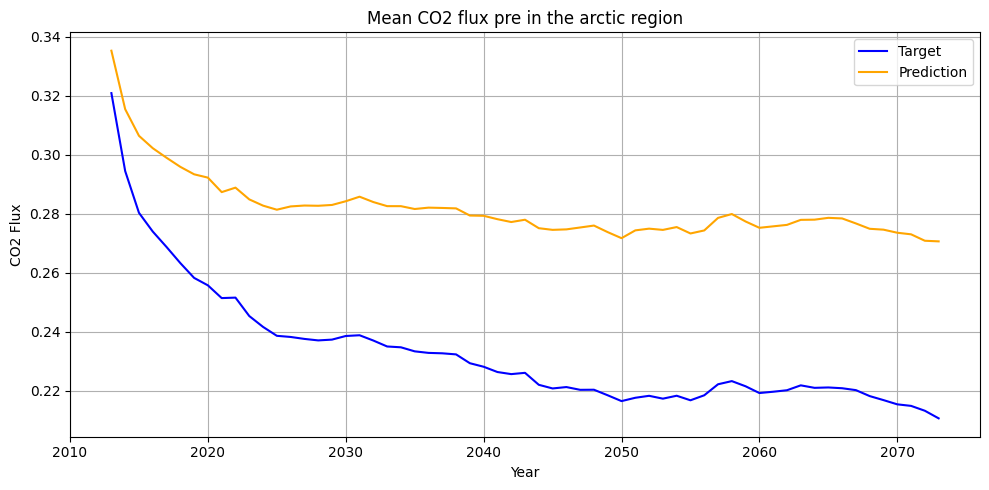

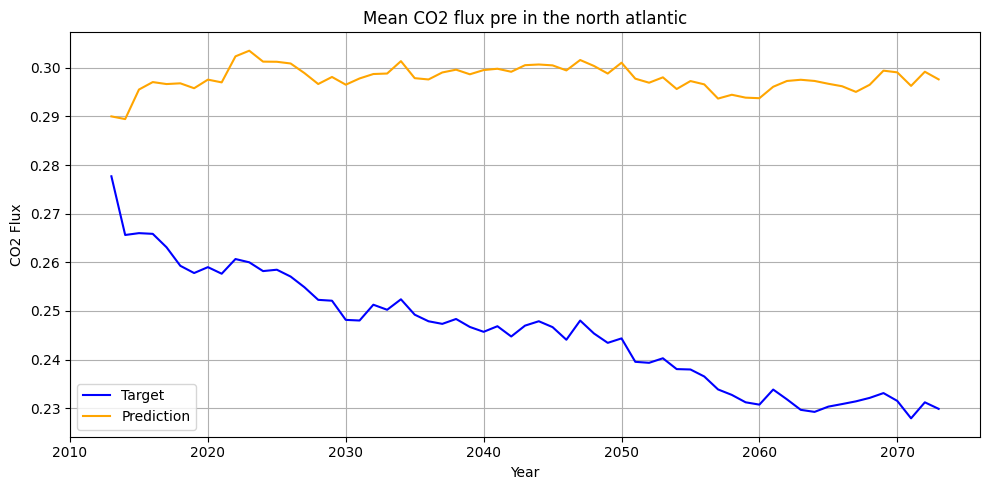

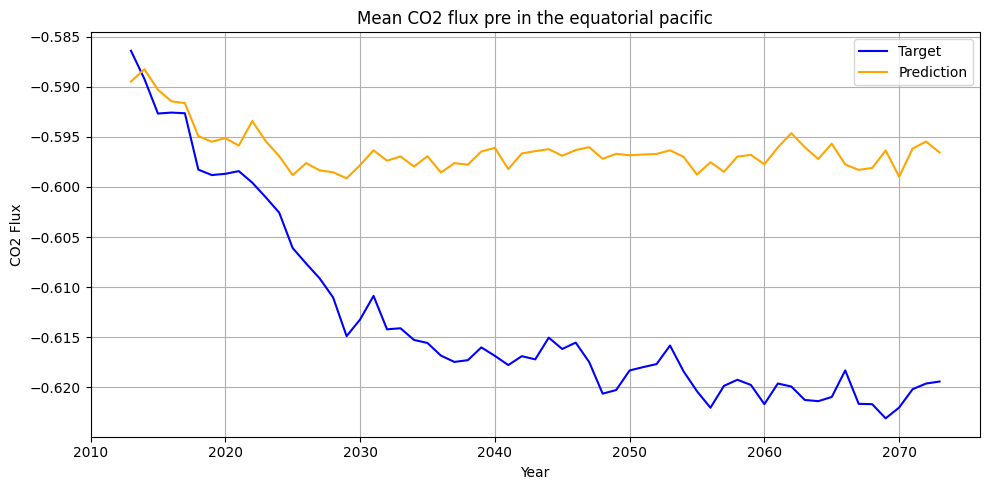

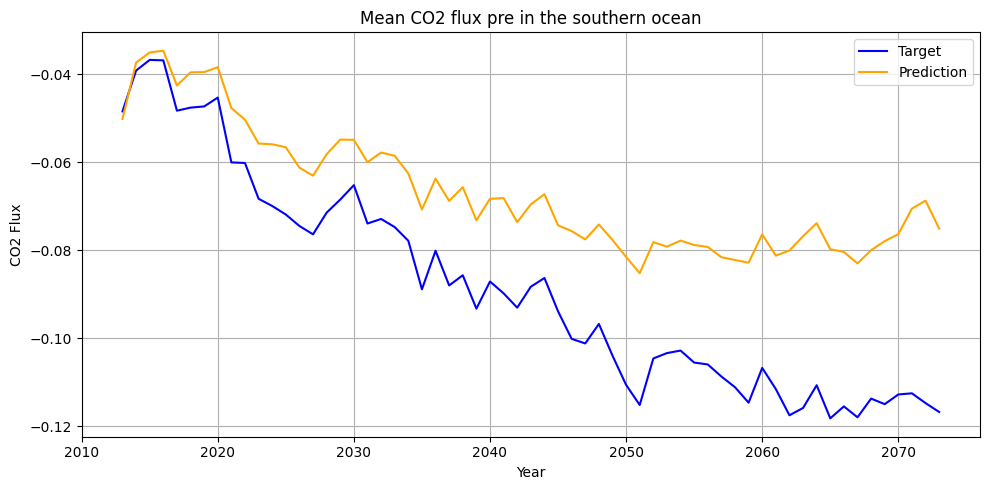

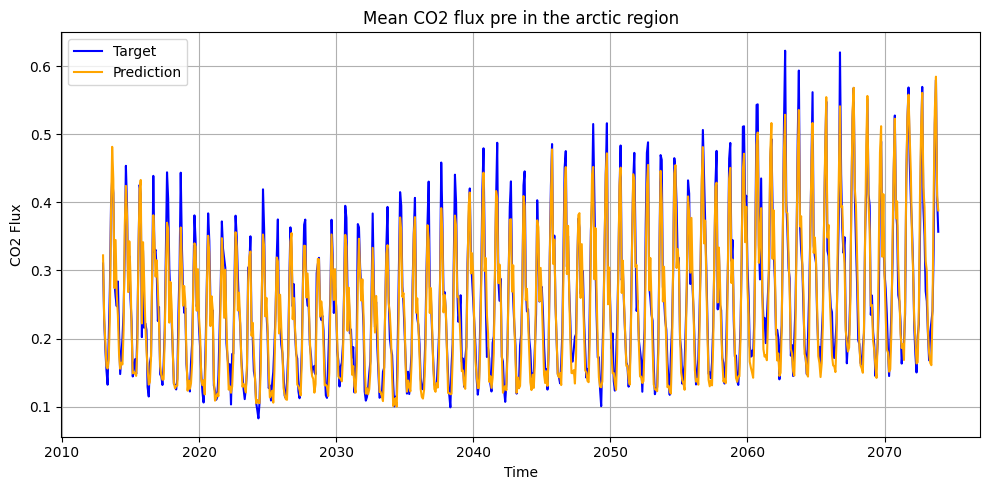

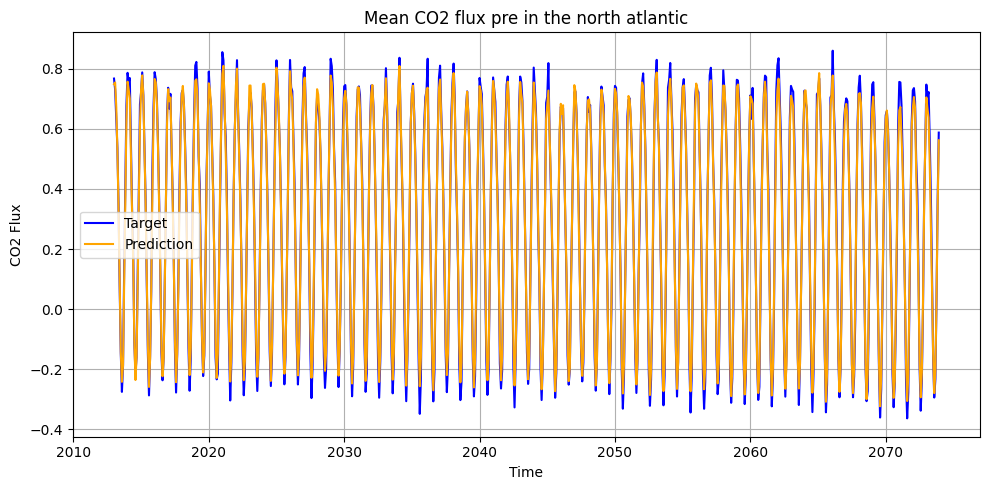

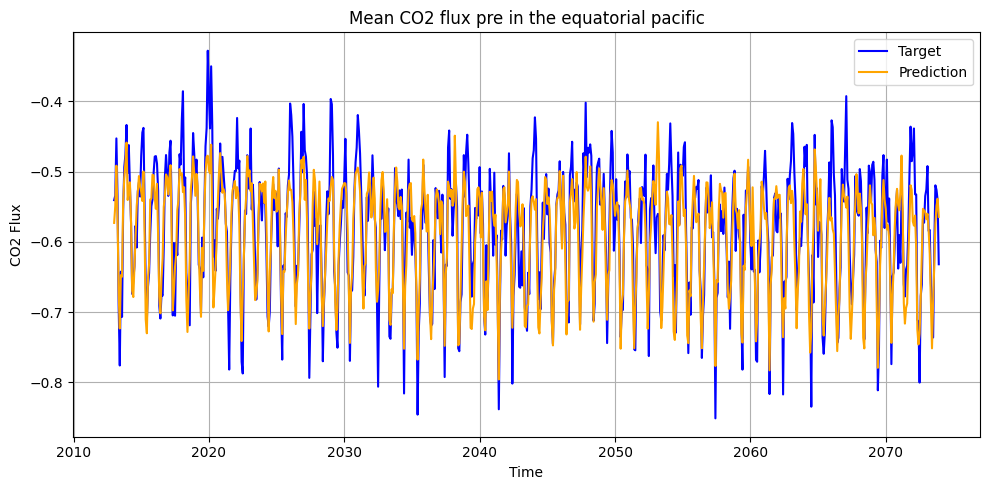

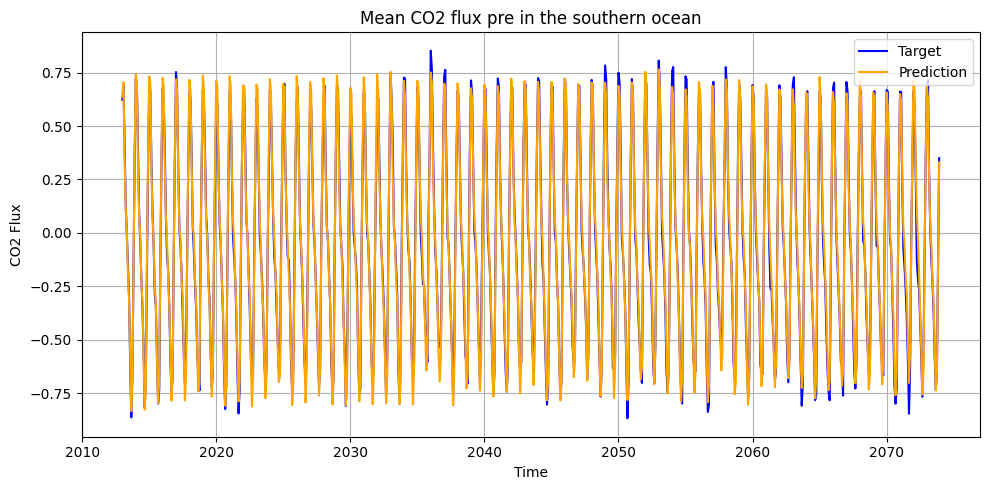

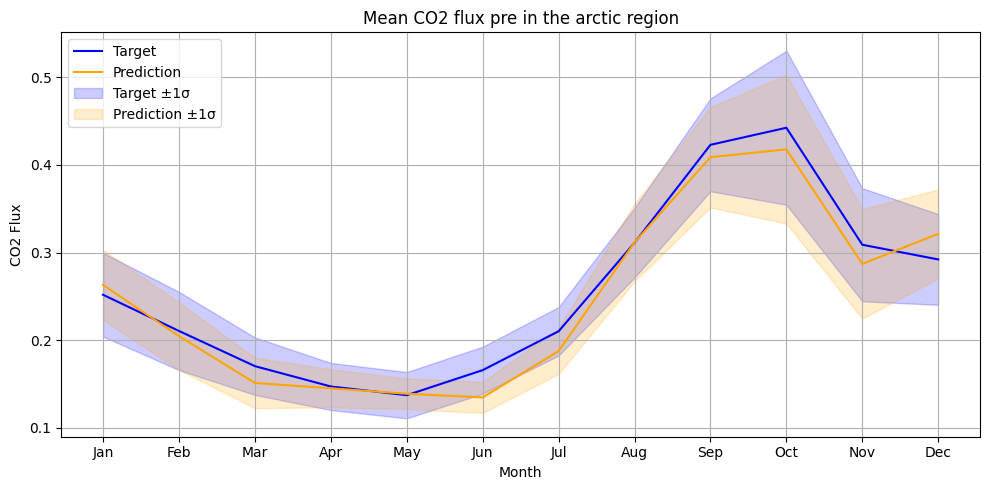

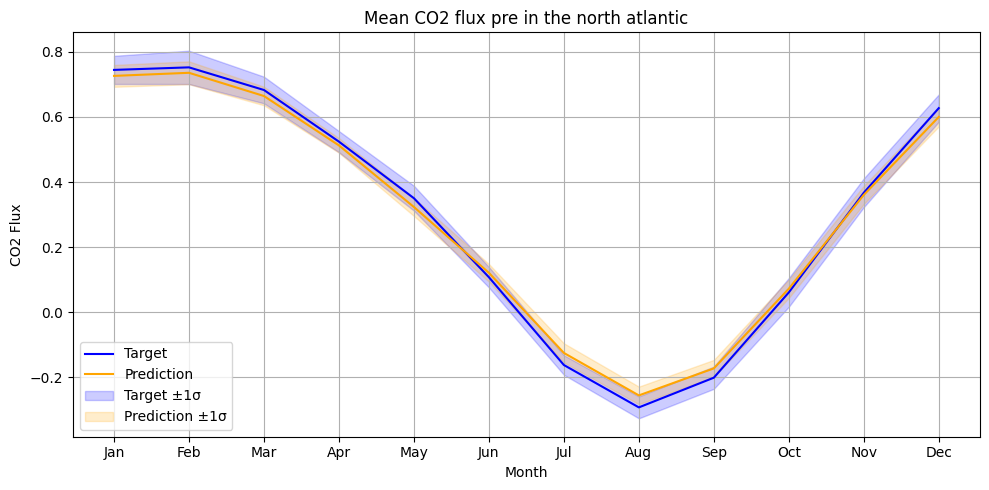

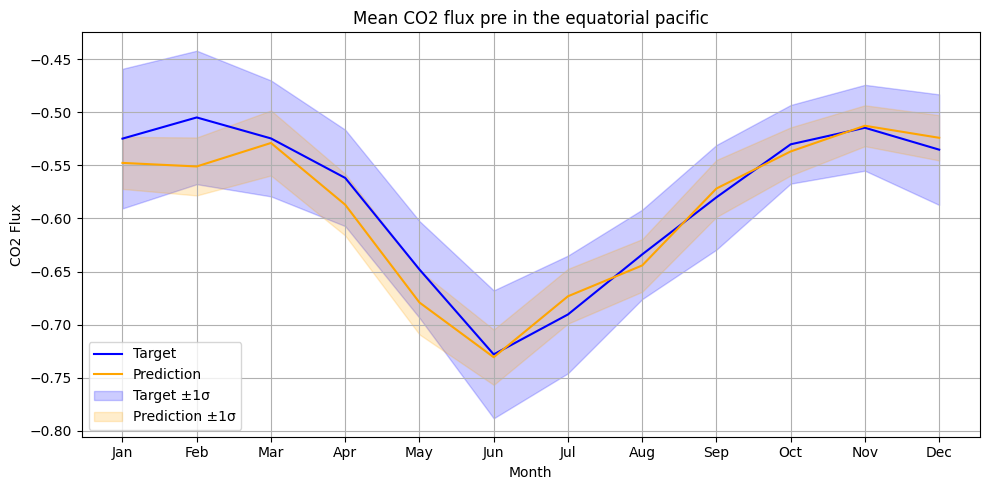

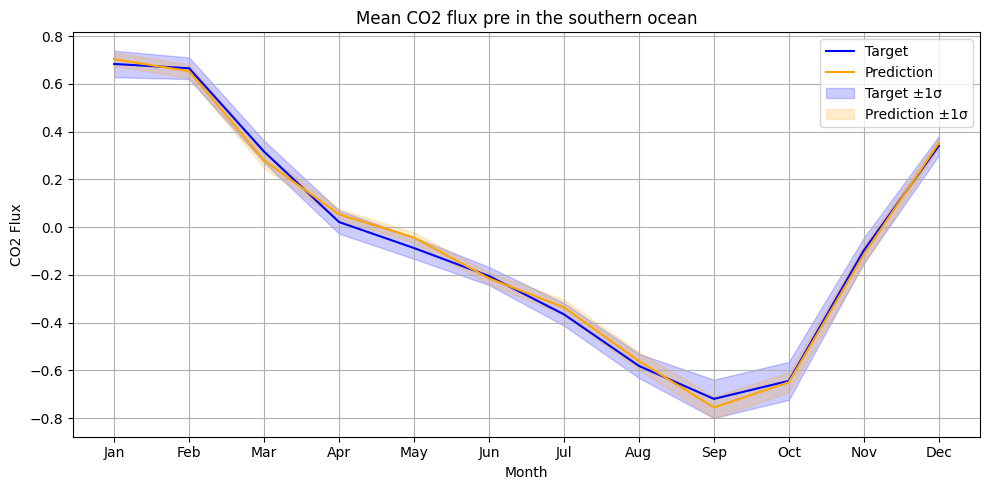

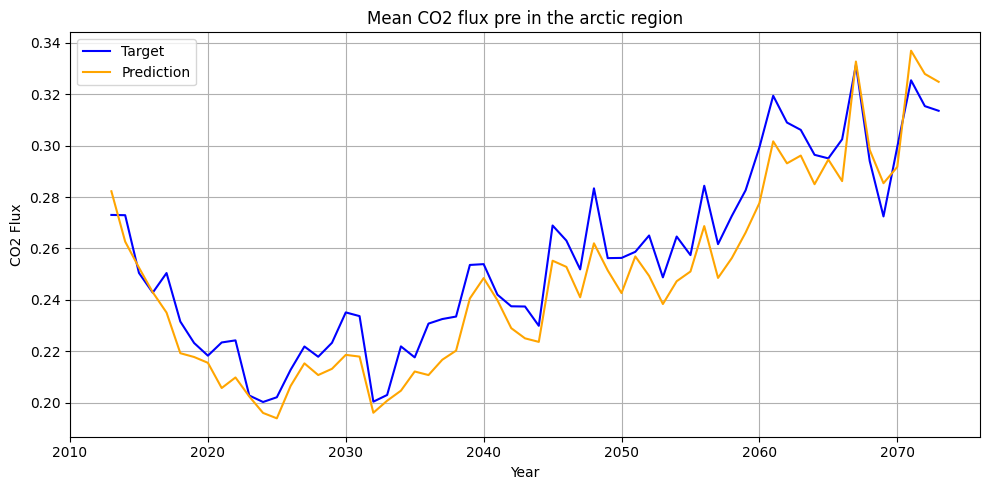

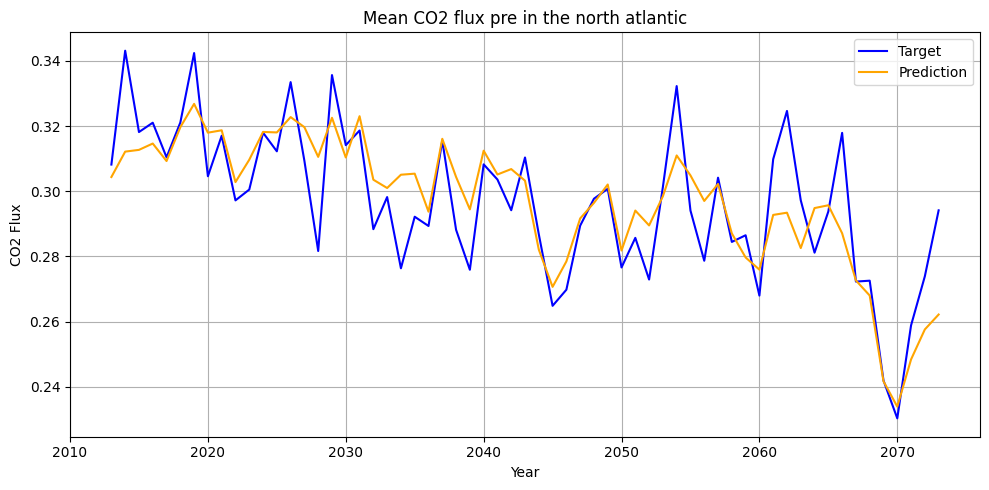

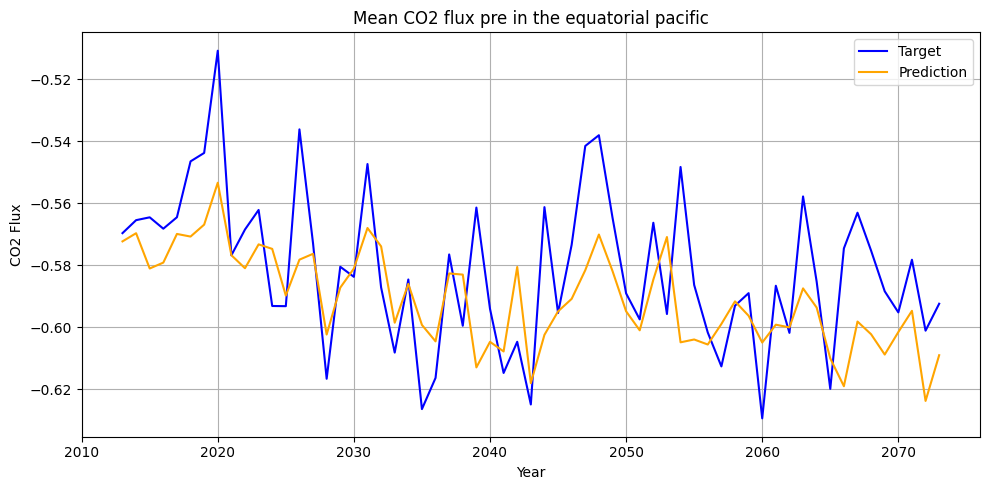

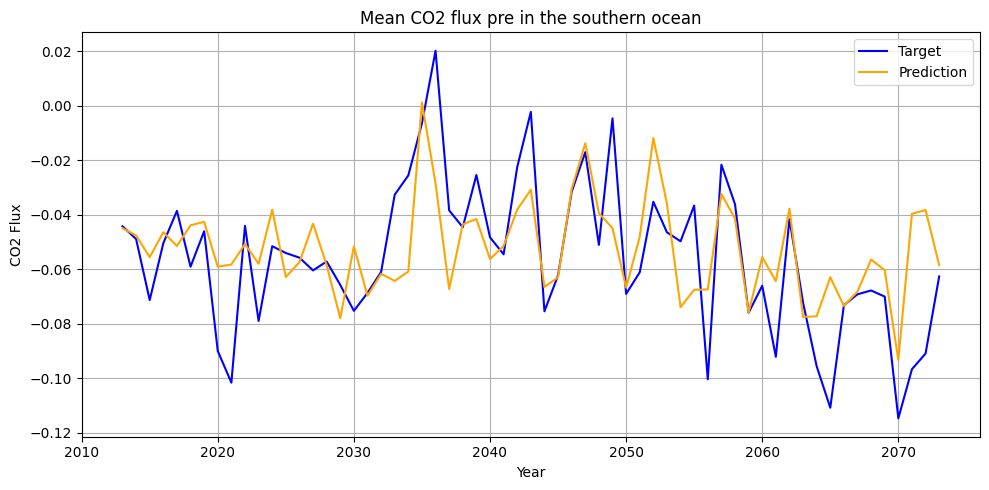

In [ ]:
from utils.model_analysis import complete_model_analysis_map

for dataset_id in datasets:
    complete_model_analysis_map(folder_path,dataset_id)